# Milestone 3

### Getting the data from website

In [1]:
# We can webscrap the data using the beautifulsoup and requests library
!pip install beautifulsoup4 requests


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# we will get the dataframe by webscraping the data and then saving the data as dataframes
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_freedom_indices"

# Sending a GET request to the website
response = requests.get(url)

# Parsing the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Finding the second table on the page (main content page)
table = soup.find_all('table')[1]

# Extracting headers from <thead>
headers = [th.get_text(strip=True) for th in table.find_all('th')]  # Use strip() to clean up header text

# Creating a list to hold the rows of the DataFrame
data = []

# Iterating through each row in the table body
for row in table.find_all('tr')[1:]:  # Skiping the header row
    cols = row.find_all('td')  # Only get <td> elements
    # Initializing a list to hold column data
    cols_text = []

    # Iterating through each column and extract text
    for idx, col in enumerate(cols):
        # If the current column is the third one (index 2), include the span text because the data is inside the span tag
        if idx == 2:
             cols_text.append(col.get_text(strip=True))  
        else:
            # Remove <span> tags and get remaining text for other columns
            for span in col.find_all('span'):
                span.decompose()  # Remove the <span> tags
            cols_text.append(col.get_text(strip=True))  # Appending cleaned text for other columns

    if cols_text:  # Ensuring that only adding rows that have data
        data.append(cols_text)

# Creating a DataFrame from the data
df = pd.DataFrame(data, columns=headers) 
df

,Country,Freedom in the World 2024[16],Score change since 2023,Index of Economic Freedom 2024[17],Score,Press Freedom Index 2023[3],Score,Democracy Index 2023[18],Score
0,Finland,100,0,mostly free,76.3,good,87.94,full democracy,9.30
1,New Zealand,99,0,mostly free,77.8,satisfactory,84.23,full democracy,9.61
2,Sweden,99,-1,mostly free,77.5,good,88.15,full democracy,9.39
3,Norway,98,-2,mostly free,77.5,good,95.18,full democracy,9.81
4,Canada,97,-1,mostly free,72.4,satisfactory,83.53,full democracy,8.69
...,...,...,...,...,...,...,...,...,...
192,North Korea,3,0,repressed,2.9,very serious,21.72,authoritarian,1.08
193,Turkmenistan,2,0,repressed,46.3,very serious,25.82,authoritarian,1.66
194,South Sudan,1,0,n/a,—,difficult,50.62,n/a,—
195,Syria,1,0,n/a,—,very serious,27.22,authoritarian,1.43


## Step 1: Assigning headers

In [3]:
# Assiging column names to the dataframe

df.columns = [
    'country', 
    'freedom_in_world_2024', 
    'score_change_since_2023', 
    'index_of_economic_freedom_2024', 
    'economic_score', 
    'press_freedom_index_2023', 
    'press_freedom_score', 
    'democracy_index_2023', 
    'democracy_score'
]
df.head()

,country,freedom_in_world_2024,score_change_since_2023,index_of_economic_freedom_2024,economic_score,press_freedom_index_2023,press_freedom_score,democracy_index_2023,democracy_score
0,Finland,100,0,mostly free,76.3,good,87.94,full democracy,9.30
1,New Zealand,99,0,mostly free,77.8,satisfactory,84.23,full democracy,9.61
2,Sweden,99,-1,mostly free,77.5,good,88.15,full democracy,9.39
3,Norway,98,-2,mostly free,77.5,good,95.18,full democracy,9.81
4,Canada,97,-1,mostly free,72.4,satisfactory,83.53,full democracy,8.69


## Step 2: Datatype Conversion

In [4]:
# Assigning appropriate datatypes to each column
df['country'] = df['country'].astype(str)
df['freedom_in_world_2024'] = pd.to_numeric(df['freedom_in_world_2024'], errors='coerce')
df['score_change_since_2023'] = pd.to_numeric(df['score_change_since_2023'], errors='coerce')
df['index_of_economic_freedom_2024'] = df['index_of_economic_freedom_2024'].astype(str)
df['economic_score'] = pd.to_numeric(df['economic_score'], errors='coerce')
df['press_freedom_index_2023'] = df['press_freedom_index_2023'].astype(str)
df['press_freedom_score'] = pd.to_numeric(df['press_freedom_score'], errors='coerce')
df['democracy_index_2023'] = df['democracy_index_2023'].astype(str)
df['democracy_score'] = pd.to_numeric(df['democracy_score'], errors='coerce')
df.head()

,country,freedom_in_world_2024,score_change_since_2023,index_of_economic_freedom_2024,economic_score,press_freedom_index_2023,press_freedom_score,democracy_index_2023,democracy_score
0,Finland,100.0,0.0,mostly free,76.3,good,87.94,full democracy,9.30
1,New Zealand,99.0,0.0,mostly free,77.8,satisfactory,84.23,full democracy,9.61
2,Sweden,99.0,-1.0,mostly free,77.5,good,88.15,full democracy,9.39
3,Norway,98.0,-2.0,mostly free,77.5,good,95.18,full democracy,9.81
4,Canada,97.0,-1.0,mostly free,72.4,satisfactory,83.53,full democracy,8.69


## Step 3: Handling missing values

In [5]:
# Handling missing values by replacing empty strings and '—' with np.nan
df.replace({'': np.nan, '—': np.nan}, inplace=True)

# Replacing 'n/a' values with np.nan
df.replace('n/a', np.nan, inplace=True)
df

,country,freedom_in_world_2024,score_change_since_2023,index_of_economic_freedom_2024,economic_score,press_freedom_index_2023,press_freedom_score,democracy_index_2023,democracy_score
0,Finland,100.0,0.0,mostly free,76.3,good,87.94,full democracy,9.30
1,New Zealand,99.0,0.0,mostly free,77.8,satisfactory,84.23,full democracy,9.61
2,Sweden,99.0,-1.0,mostly free,77.5,good,88.15,full democracy,9.39
3,Norway,98.0,-2.0,mostly free,77.5,good,95.18,full democracy,9.81
4,Canada,97.0,-1.0,mostly free,72.4,satisfactory,83.53,full democracy,8.69
...,...,...,...,...,...,...,...,...,...
192,North Korea,3.0,0.0,repressed,2.9,very serious,21.72,authoritarian,1.08
193,Turkmenistan,2.0,0.0,repressed,46.3,very serious,25.82,authoritarian,1.66
194,South Sudan,1.0,0.0,NaN,NaN,difficult,50.62,NaN,NaN
195,Syria,1.0,0.0,NaN,NaN,very serious,27.22,authoritarian,1.43


## Step 4: Removing duplicates

In [6]:
# Removing rows with duplicate country names, keeping only the first occurrence
df = df.drop_duplicates(subset='country', keep='first')
df.head()


,country,freedom_in_world_2024,score_change_since_2023,index_of_economic_freedom_2024,economic_score,press_freedom_index_2023,press_freedom_score,democracy_index_2023,democracy_score
0,Finland,100.0,0.0,mostly free,76.3,good,87.94,full democracy,9.30
1,New Zealand,99.0,0.0,mostly free,77.8,satisfactory,84.23,full democracy,9.61
2,Sweden,99.0,-1.0,mostly free,77.5,good,88.15,full democracy,9.39
3,Norway,98.0,-2.0,mostly free,77.5,good,95.18,full democracy,9.81
4,Canada,97.0,-1.0,mostly free,72.4,satisfactory,83.53,full democracy,8.69


## Step 5: Fix casing

In [7]:
# Converting the county names into Title case
df['country'] = df['country'].str.title()
df.head()

,country,freedom_in_world_2024,score_change_since_2023,index_of_economic_freedom_2024,economic_score,press_freedom_index_2023,press_freedom_score,democracy_index_2023,democracy_score
0,Finland,100.0,0.0,mostly free,76.3,good,87.94,full democracy,9.30
1,New Zealand,99.0,0.0,mostly free,77.8,satisfactory,84.23,full democracy,9.61
2,Sweden,99.0,-1.0,mostly free,77.5,good,88.15,full democracy,9.39
3,Norway,98.0,-2.0,mostly free,77.5,good,95.18,full democracy,9.81
4,Canada,97.0,-1.0,mostly free,72.4,satisfactory,83.53,full democracy,8.69


## Step 6: Identifying outliers

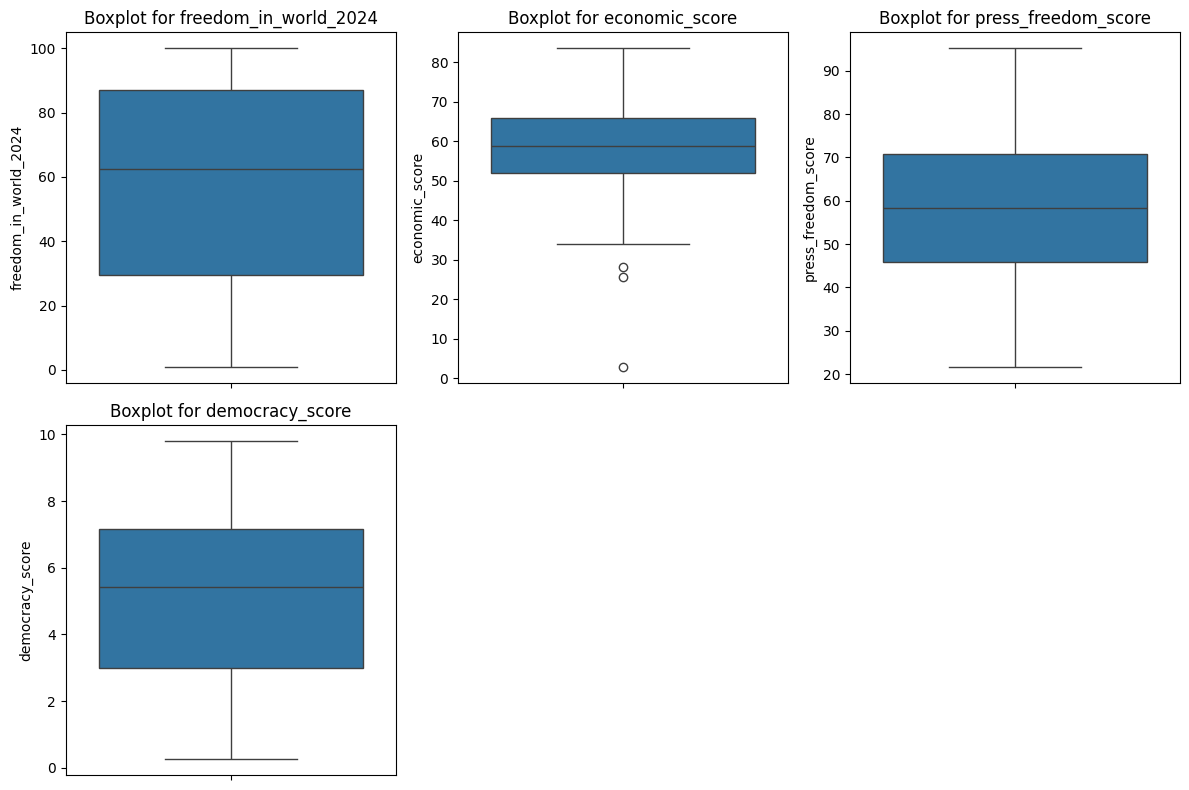

In [8]:
# importing libraries for plotting the data
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the numerical columns for which we will create boxplots
numerical_columns = [
    'freedom_in_world_2024',  
    'economic_score', 
    'press_freedom_score', 
    'democracy_score'
]

# Creating a boxplot for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot for {column}')

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()
# By observing the plots we can say that there are no major outliers

## Final dataset

In [9]:
df

,country,freedom_in_world_2024,score_change_since_2023,index_of_economic_freedom_2024,economic_score,press_freedom_index_2023,press_freedom_score,democracy_index_2023,democracy_score
0,Finland,100.0,0.0,mostly free,76.3,good,87.94,full democracy,9.30
1,New Zealand,99.0,0.0,mostly free,77.8,satisfactory,84.23,full democracy,9.61
2,Sweden,99.0,-1.0,mostly free,77.5,good,88.15,full democracy,9.39
3,Norway,98.0,-2.0,mostly free,77.5,good,95.18,full democracy,9.81
4,Canada,97.0,-1.0,mostly free,72.4,satisfactory,83.53,full democracy,8.69
...,...,...,...,...,...,...,...,...,...
192,North Korea,3.0,0.0,repressed,2.9,very serious,21.72,authoritarian,1.08
193,Turkmenistan,2.0,0.0,repressed,46.3,very serious,25.82,authoritarian,1.66
194,South Sudan,1.0,0.0,NaN,NaN,difficult,50.62,NaN,NaN
195,Syria,1.0,0.0,NaN,NaN,very serious,27.22,authoritarian,1.43


In [10]:
import sqlite3

# Specify SQLite database file (it will be created if it doesn't exist)
db_file = 'milestone5.db'

# Connect to SQLite database
conn = sqlite3.connect(db_file)

# Specify the table name
table_name = 'freedom_indices'

# Save DataFrame to SQLite table
df.to_sql(table_name, conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print(f"DataFrame has been saved as a table '{table_name}' in the SQLite database '{db_file}'.")


DataFrame has been saved as a table 'freedom_indices' in the SQLite database 'milestone5.db'.
